In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [7]:
df=pd.read_csv("/content/Walmart DataSet.csv")

In [8]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [10]:
df["Date"]=pd.to_datetime(df["Date"],format='%d-%m-%Y')

In [11]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


In [12]:
df.isnull().sum()

,0
Store,0
Date,0
Weekly_Sales,0
Holiday_Flag,0
Temperature,0
Fuel_Price,0
CPI,0
Unemployment,0


In [13]:
df.duplicated().sum()

np.int64(0)

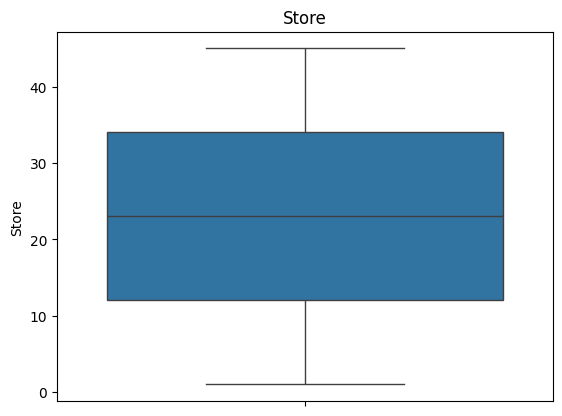

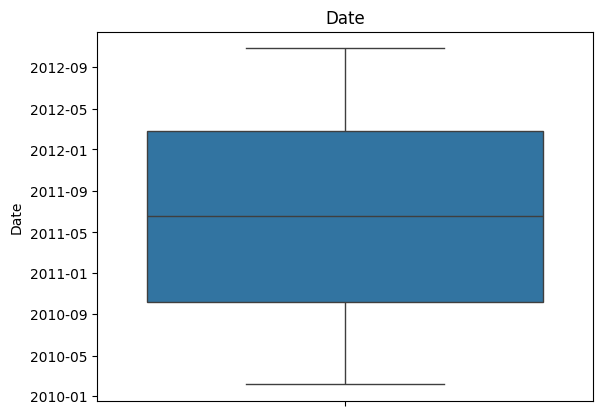

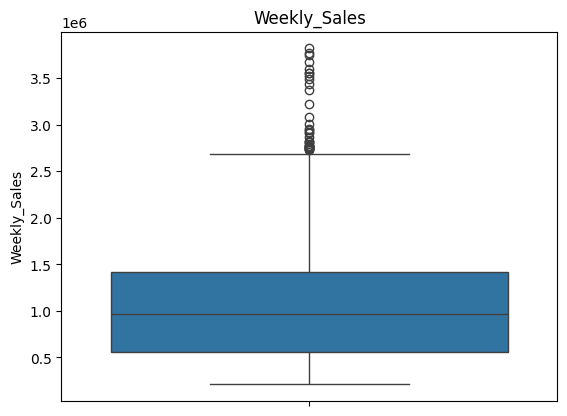

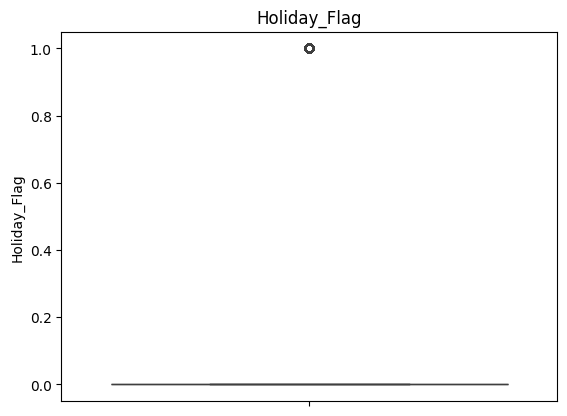

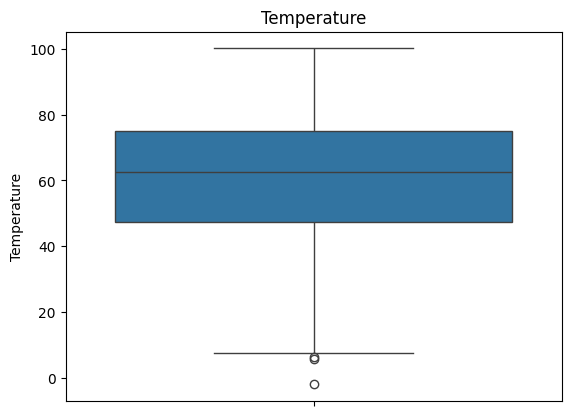

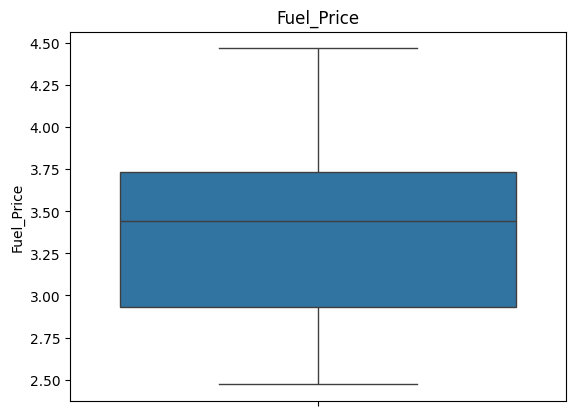

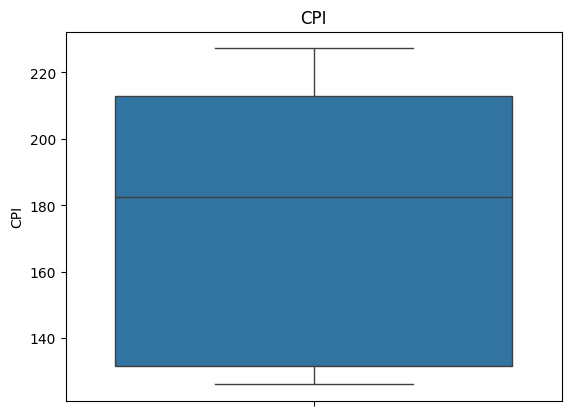

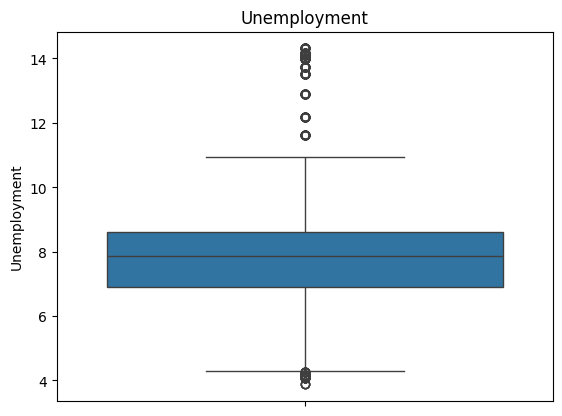

In [14]:
for i in df.columns:
  if df[i].dtype!="object":
    sns.boxplot(df[i])
    plt.title(i)
    plt.show()

a. If the weekly sales are affected by the unemployment rate, if yes - which stores
are suffering the most?

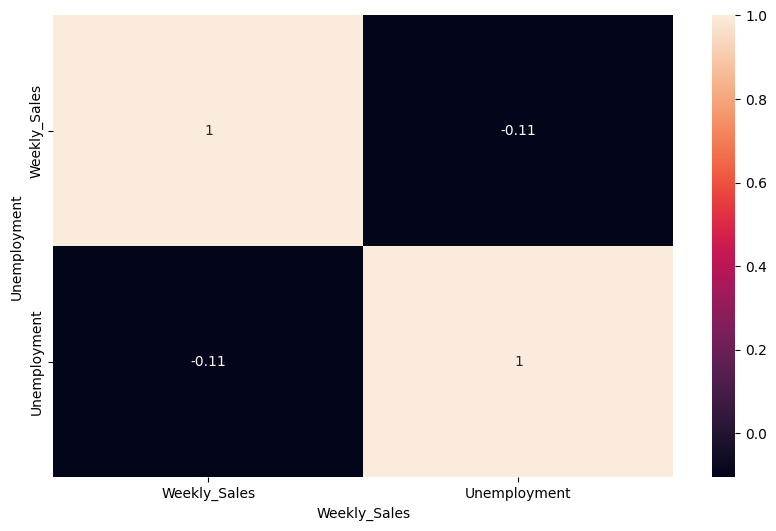

In [15]:
plt.figure(figsize=(10,6))
sns.heatmap(df[["Weekly_Sales","Unemployment"]].corr(),annot=True,color="blue")
plt.xlabel("Weekly_Sales")
plt.ylabel("Unemployment")
plt.show()

In [16]:
df[["Weekly_Sales","Unemployment"]].corr()

,Weekly_Sales,Unemployment
Weekly_Sales,1.000000,-0.106176
Unemployment,-0.106176,1.000000


In [17]:
store_correlation=df.groupby("Store")[["Weekly_Sales","Unemployment"]].corr()

In [18]:
store_correlation

Weekly_Sales  Unemployment
Store                                         
1     Weekly_Sales      1.000000     -0.097955
      Unemployment     -0.097955      1.000000
2     Weekly_Sales      1.000000      0.066325
      Unemployment      0.066325      1.000000
3     Weekly_Sales      1.000000     -0.230413
...                          ...           ...
43    Unemployment     -0.201954      1.000000
44    Weekly_Sales      1.000000     -0.780076
      Unemployment     -0.780076      1.000000
45    Weekly_Sales      1.000000     -0.004041
      Unemployment     -0.004041      1.000000

[90 rows x 2 columns]

In [19]:
store_correlation.sort_values(by="Unemployment",ascending=True)

,,Weekly_Sales,Unemployment
Store,,,
38,Weekly_Sales,1.000000,-0.785290
44,Weekly_Sales,1.000000,-0.780076
39,Weekly_Sales,1.000000,-0.384681
42,Weekly_Sales,1.000000,-0.356355
41,Weekly_Sales,1.000000,-0.350630
...,...,...,...
42,Unemployment,-0.356355,1.000000
43,Unemployment,-0.201954,1.000000
41,Unemployment,-0.350630,1.000000


Conclusion: Unemployment has a very weak negative correlation with Weekly Sales. The correlation score of -0.106176.This weak relationship suggests that Unemployment has a minimal impact on Weekly Sales across the dataset. But even considering this weak relationship , the most affected store is store no 38, as unemployment increases in this store , weekly sales drops


In [20]:
seasonal_trend=df[["Date","Weekly_Sales"]]

In [21]:
seasonal_trend.set_index("Date",inplace=True)

In [22]:
seasonal_trend

,Weekly_Sales
Date,
2010-02-05,1643690.90
2010-02-12,1641957.44
2010-02-19,1611968.17
2010-02-26,1409727.59
2010-03-05,1554806.68
...,...
2012-09-28,713173.95
2012-10-05,733455.07
2012-10-12,734464.36


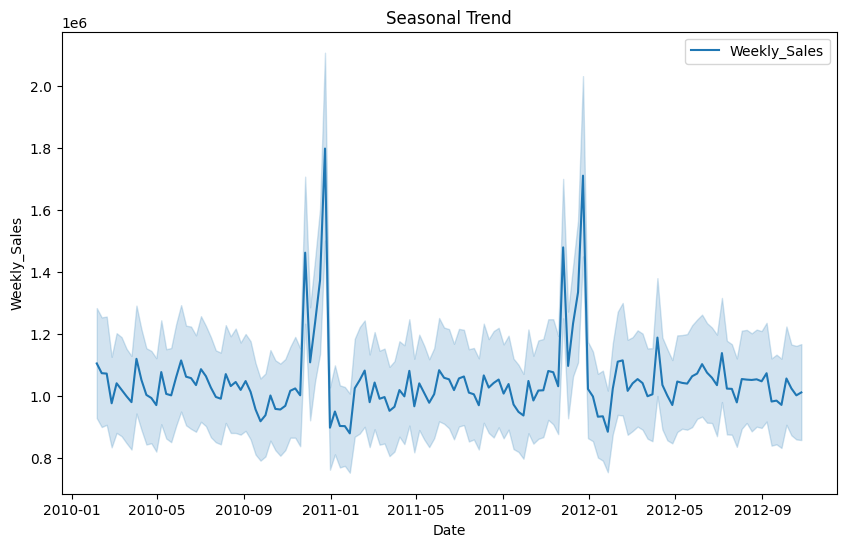

In [23]:
plt.figure(figsize=(10,6))
sns.lineplot(seasonal_trend)
plt.xlabel("Date")
plt.ylabel("Weekly_Sales")
plt.title("Seasonal Trend")
plt.show()

# conclusion: the weekly sales shows seasonal trend , the sales are peak at the year end as it is the holiday season of christmas and new year

In [ ]:
#c. Does temperature affect the weekly sales in any manner?

In [24]:
df[["Weekly_Sales","Temperature"]].corr()

,Weekly_Sales,Temperature
Weekly_Sales,1.00000,-0.06381
Temperature,-0.06381,1.00000


<Axes: >

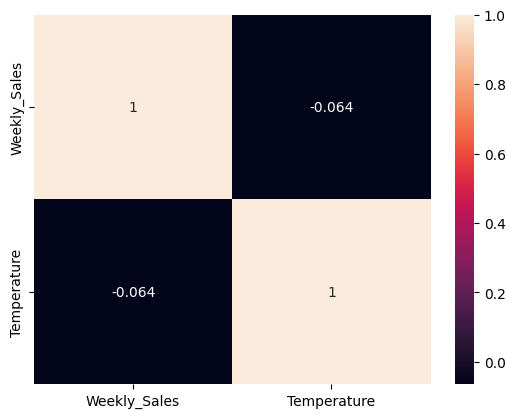

In [25]:
sns.heatmap(df[["Weekly_Sales","Temperature"]].corr(),annot=True,color="Blue")

#A correlation of -0.06 between Weekly Sales and Temperature suggests a very weak negative relationship.
Since -0.06 is close to 0, the relationship between temperature and sales is almost negligible.
A slight negative correlation means that as temperature increases, sales tend to decrease slightly, but the effect is very weak.

d.) How is the Consumer Price index affecting the weekly sales of various stores?

In [26]:
df[["Weekly_Sales","CPI"]].corr()

,Weekly_Sales,CPI
Weekly_Sales,1.000000,-0.072634
CPI,-0.072634,1.000000


In [27]:
storewise_cpi=df.groupby("Store")[["Weekly_Sales","CPI"]].corr()

In [28]:
storewise_cpi

Weekly_Sales       CPI
Store                                     
1     Weekly_Sales      1.000000  0.225408
      CPI               0.225408  1.000000
2     Weekly_Sales      1.000000 -0.062431
      CPI              -0.062431  1.000000
3     Weekly_Sales      1.000000  0.317250
...                          ...       ...
43    CPI              -0.285686  1.000000
44    Weekly_Sales      1.000000  0.740150
      CPI               0.740150  1.000000
45    Weekly_Sales      1.000000 -0.023548
      CPI              -0.023548  1.000000

[90 rows x 2 columns]

e. Top performing stores according to the historical data.

In [29]:
store_performance=pd.DataFrame(df.groupby("Store")["Weekly_Sales"].sum().reset_index())

In [30]:
store_performance.columns=["Store","Total_Sales"]

In [31]:
store_performance["Total_Sales"]=store_performance["Total_Sales"].astype(int)

In [32]:
store_performance

,Store,Total_Sales
0,1,222402808
1,2,275382440
2,3,57586735
3,4,299543953
4,5,45475688
5,6,223756130
6,7,81598275
7,8,129951181
8,9,77789218
9,10,271617713


In [33]:
store_performance.sort_values(by="Total_Sales",ascending=False)

,Store,Total_Sales
19,20,301397792
3,4,299543953
13,14,288999911
12,13,286517703
1,2,275382440
9,10,271617713
26,27,253855916
5,6,223756130
0,1,222402808
38,39,207445542


# highest preforming store is store no 20
top 5 performaing stores are no (20,4,14,13,2)


f. The worst performing store, and how significant is the difference between the
highest and lowest performing stores.

In [34]:
store_performance.sort_values(by="Total_Sales",ascending=True)

,Store,Total_Sales
32,33,37160221
43,44,43293087
4,5,45475688
35,36,53412214
37,38,55159626
2,3,57586735
29,30,62716885
36,37,74202740
15,16,74252425
28,29,77141554


In [35]:
difference=301397792-37160221

In [36]:
difference

264237571

highest performaing store is no 20 with sales of 301397792
the worst performing store is no 33 with sales of 37160221

the difference is $264237571

2. Use predictive modeling techniques to forecast the sales for each store for the next 12
weeks.

#prediction for store 1


In [181]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [183]:
df1=df1=df.loc[df["Store"]==1, ["Date","Weekly_Sales"]]

In [42]:
df1

,Date,Weekly_Sales
0,2010-02-05,1643690.90
1,2010-02-12,1641957.44
2,2010-02-19,1611968.17
3,2010-02-26,1409727.59
4,2010-03-05,1554806.68
...,...,...
138,2012-09-28,1437059.26
139,2012-10-05,1670785.97
140,2012-10-12,1573072.81
141,2012-10-19,1508068.77


In [184]:
df1["Date"]=pd.to_datetime(df1["Date"])

In [185]:
df1.set_index("Date",inplace=True)

In [186]:
df1

,Weekly_Sales
Date,
2010-02-05,1643690.90
2010-02-12,1641957.44
2010-02-19,1611968.17
2010-02-26,1409727.59
2010-03-05,1554806.68
...,...
2012-09-28,1437059.26
2012-10-05,1670785.97
2012-10-12,1573072.81


<Axes: xlabel='Date'>

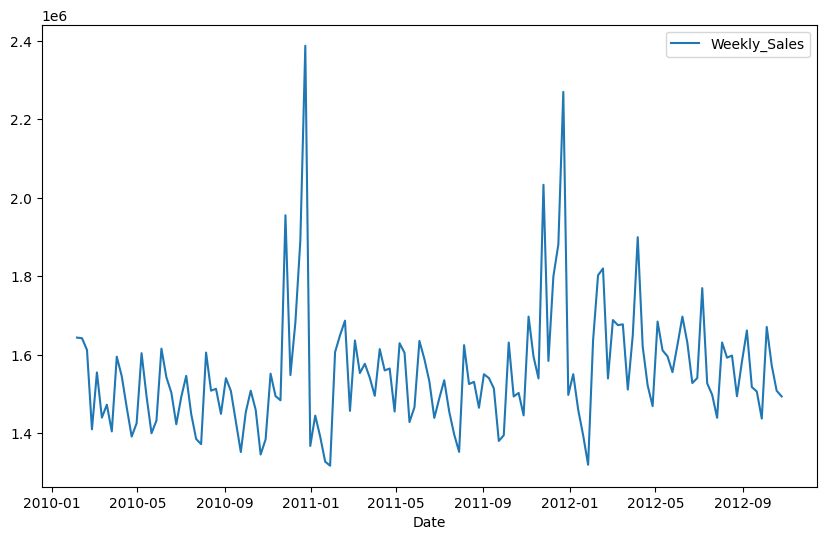

In [187]:
plt.figure(figsize=(10,6))
sns.lineplot(df1)

In [188]:
decompose=seasonal_decompose(df1,period=12)

Figure(640x480)


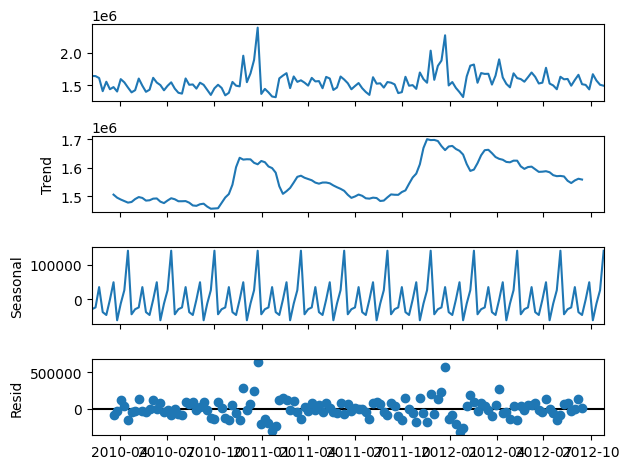

In [189]:
print(decompose.plot())

<Axes: xlabel='Date'>

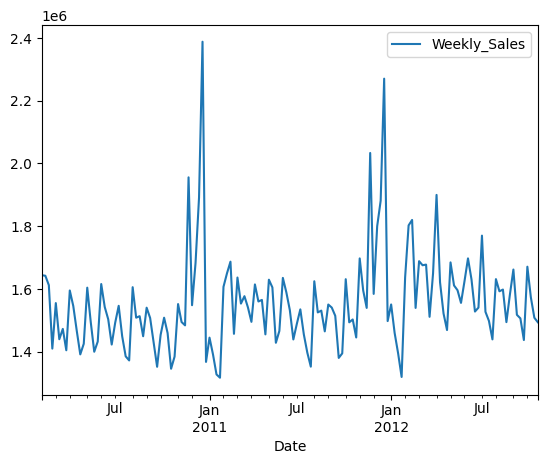

In [190]:
df1.plot()

In [191]:
df1.shape

(143, 1)

In [192]:
log_df=np.log(df1)

<Axes: xlabel='Date'>

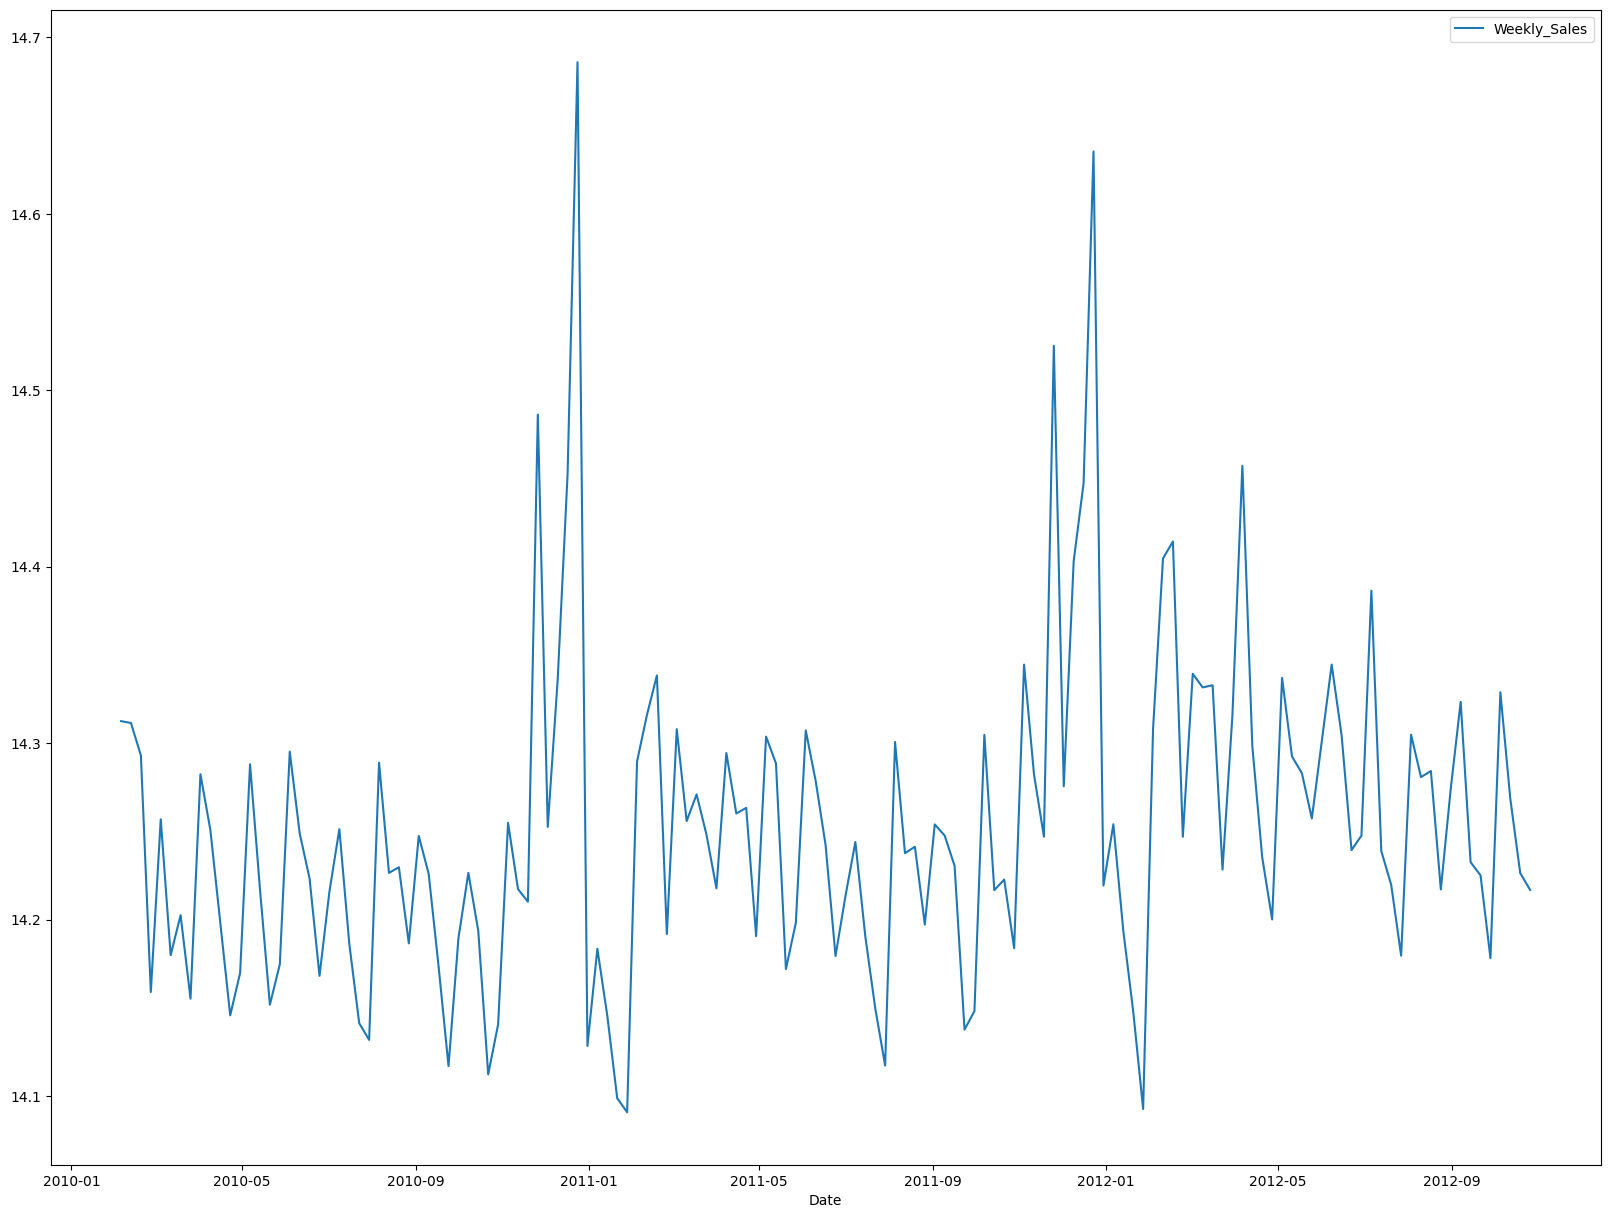

In [193]:
plt.figure(figsize=(20,15))
sns.lineplot(log_df)

In [194]:
log_df

,Weekly_Sales
Date,
2010-02-05,14.312455
2010-02-12,14.311400
2010-02-19,14.292966
2010-02-26,14.158907
2010-03-05,14.256862
...,...
2012-09-28,14.178109
2012-10-05,14.328805
2012-10-12,14.268541


In [195]:
rolling_mean=log_df.rolling(window=12).mean()
rolling_std=log_df.rolling(window=12).std()


In [196]:
rolling_mean

,Weekly_Sales
Date,
2010-02-05,NaN
2010-02-12,NaN
2010-02-19,NaN
2010-02-26,NaN
2010-03-05,NaN
...,...
2012-09-28,14.246508
2012-10-05,14.254006
2012-10-12,14.258083


In [197]:
rolling_mean = rolling_mean.reset_index()
rolling_std = rolling_std.reset_index()

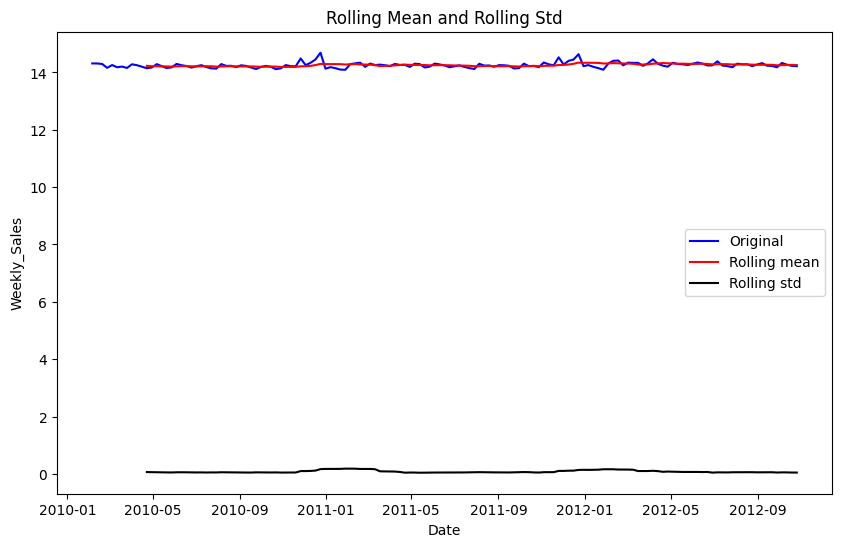

In [199]:
plt.figure(figsize=(10,6))
sns.lineplot(x="Date",y="Weekly_Sales",color = 'blue',label = 'Original',data=log_df)
sns.lineplot(x="Date",y="Weekly_Sales",data=rolling_mean,color = 'red',label = 'Rolling mean')
sns.lineplot(x="Date",y="Weekly_Sales",data=rolling_std,color = 'black',label = 'Rolling std')
plt.legend(loc = 'best')
plt.title('Rolling Mean and Rolling Std')
plt.show()

In [ ]:
#so the data is somwhate stationary so looks like it needs no differencing


In [200]:
train=log_df.iloc[:120,:]
test=log_df.iloc[120:,:]

In [225]:
test.shape

(23, 1)

In [ ]:
# using Itertools

In [202]:
p=range(1,8)
d=range(0,1)
q=range(1,8)
import itertools

In [203]:
pdq_combination=list(itertools.product(p,d,q))

In [204]:
pdq_combination

[(1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 0, 5),
 (1, 0, 6),
 (1, 0, 7),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 0, 5),
 (2, 0, 6),
 (2, 0, 7),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 0, 5),
 (3, 0, 6),
 (3, 0, 7),
 (4, 0, 1),
 (4, 0, 2),
 (4, 0, 3),
 (4, 0, 4),
 (4, 0, 5),
 (4, 0, 6),
 (4, 0, 7),
 (5, 0, 1),
 (5, 0, 2),
 (5, 0, 3),
 (5, 0, 4),
 (5, 0, 5),
 (5, 0, 6),
 (5, 0, 7),
 (6, 0, 1),
 (6, 0, 2),
 (6, 0, 3),
 (6, 0, 4),
 (6, 0, 5),
 (6, 0, 6),
 (6, 0, 7),
 (7, 0, 1),
 (7, 0, 2),
 (7, 0, 3),
 (7, 0, 4),
 (7, 0, 5),
 (7, 0, 6),
 (7, 0, 7)]

In [205]:
from sklearn.metrics import mean_squared_error

In [206]:
from statsmodels.tsa.arima.model import ARIMA

In [228]:
rmse=[]
order=[]
for pdq in pdq_combination:
  model=ARIMA(train,order=pdq)
  model_fit=model.fit()
  pred=model_fit.predict(start=120,end=142)
  error=np.sqrt(mean_squared_error(test,pred))
  order.append(pdq)
  rmse.append(error)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  

In [229]:
results=pd.DataFrame(index=order,data=rmse,columns=["RMSE"])

In [230]:
results

,RMSE
"(1, 0, 1)",0.052708
"(1, 0, 2)",0.053649
"(1, 0, 3)",0.053577
"(1, 0, 4)",0.050908
"(1, 0, 5)",0.051562
"(1, 0, 6)",0.051427
"(1, 0, 7)",0.049722
"(2, 0, 1)",0.052512
"(2, 0, 2)",0.053582
"(2, 0, 3)",0.054242


In [231]:
results.sort_values(by="RMSE",ascending=True)

,RMSE
"(7, 0, 7)",0.047409
"(6, 0, 6)",0.047605
"(5, 0, 4)",0.047772
"(5, 0, 6)",0.047949
"(5, 0, 7)",0.048111
"(7, 0, 6)",0.048930
"(6, 0, 5)",0.049323
"(4, 0, 4)",0.049348
"(6, 0, 7)",0.049639
"(5, 0, 5)",0.049658


In [232]:
model=ARIMA(train,order=(7, 0, 7),seasonal_order=(7,0,7,12))

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


In [233]:
model_fit=model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [234]:
log_df["Arima Prediction"]=model_fit.predict(end=len(train)+len(test)-1)

In [163]:
log_df.drop(columns=["Arima Predictio"],inplace=True)

In [235]:
log_df

,Weekly_Sales,Arima Prediction
Date,,
2010-02-05,14.312455,14.252976
2010-02-12,14.311400,14.272440
2010-02-19,14.292966,14.273458
2010-02-26,14.158907,14.266351
2010-03-05,14.256862,14.227162
...,...,...
2012-09-28,14.178109,14.241376
2012-10-05,14.328805,14.310002
2012-10-12,14.268541,14.257688


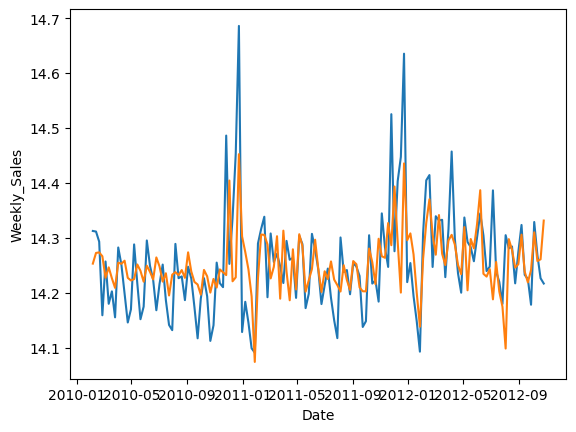

In [236]:
sns.lineplot(log_df["Weekly_Sales"])
sns.lineplot(log_df["Arima Prediction"])
plt.show()

<Axes: xlabel='Date', ylabel='Weekly_Sales'>

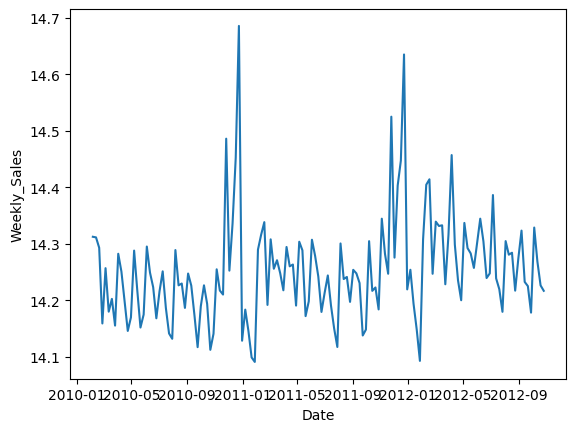

In [237]:
sns.lineplot(log_df["Weekly_Sales"])


In [241]:
future=model_fit.forecast(steps=35)

In [242]:
future

,predicted_mean
2012-05-25,14.280841
2012-06-01,14.324962
2012-06-08,14.386720
2012-06-15,14.234420
2012-06-22,14.229357
2012-06-29,14.243076
2012-07-06,14.187911
2012-07-13,14.256018
2012-07-20,14.202195
2012-07-27,14.174512


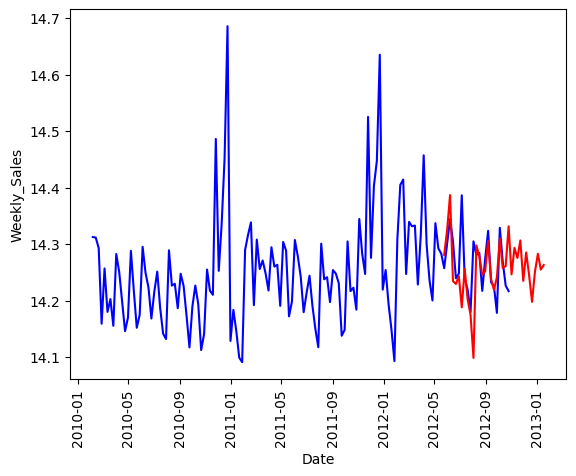

In [243]:
sns.lineplot(log_df["Weekly_Sales"],color="blue")
sns.lineplot(future,color="red")
plt.xticks(rotation=90)
plt.show()

#Prediction for store 2


In [246]:
df2=df.loc[df["Store"]==2, ["Date","Weekly_Sales"]]

In [252]:
df2.set_index("Date", inplace=True)

In [253]:
df2

,Weekly_Sales
Date,
2010-02-05,2136989.46
2010-02-12,2137809.50
2010-02-19,2124451.54
2010-02-26,1865097.27
2010-03-05,1991013.13
...,...
2012-09-28,1746470.56
2012-10-05,1998321.04
2012-10-12,1900745.13


<Axes: xlabel='Date'>

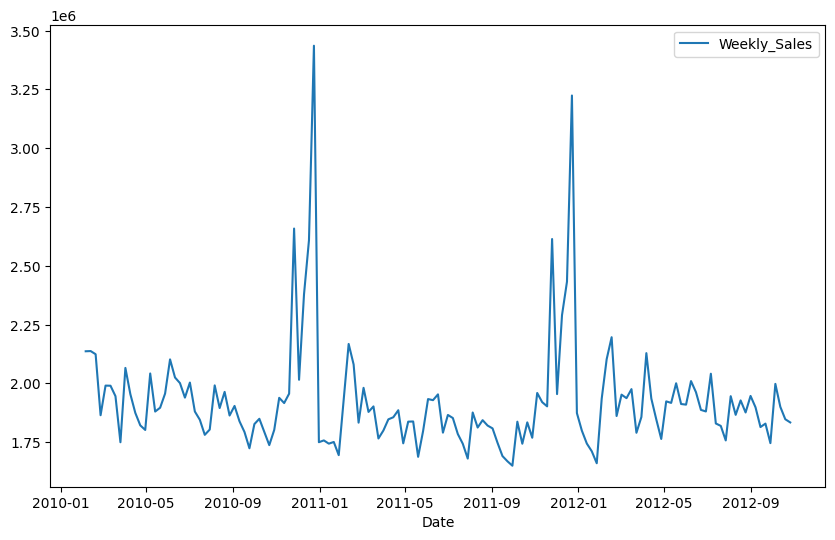

In [254]:
plt.figure(figsize=(10,6))
sns.lineplot(df2)

Figure(640x480)


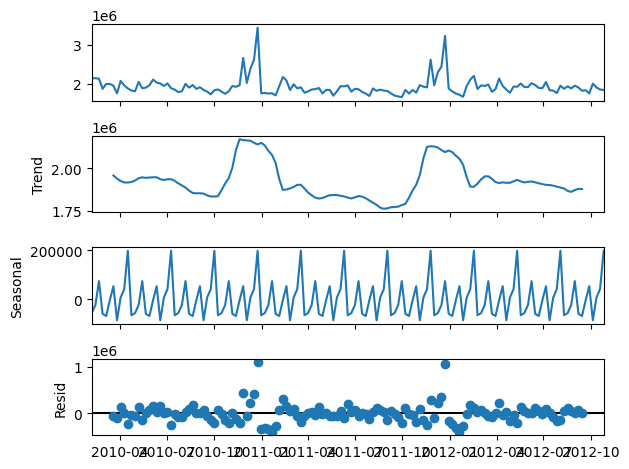

In [255]:
decompose2=seasonal_decompose(df2,period=12)
print(decompose2.plot())

In [256]:
df2.shape

(143, 1)

In [257]:
log_df2=np.log(df2)

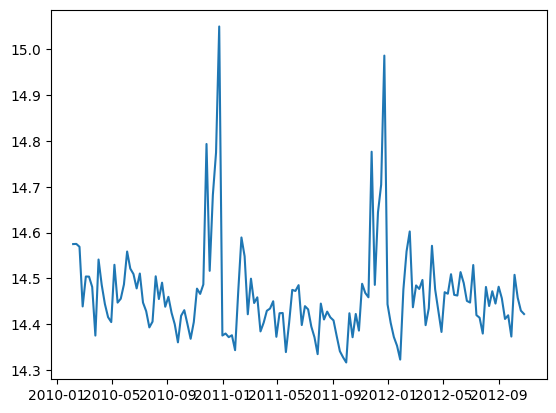

In [258]:
plt.plot(log_df2)

In [273]:
rolling_mean=log_df2.rolling(window=12).mean()
rolling_std=log_df2.rolling(window=12).std()

In [274]:
rolling_mean = rolling_mean.reset_index()
rolling_std = rolling_std.reset_index()

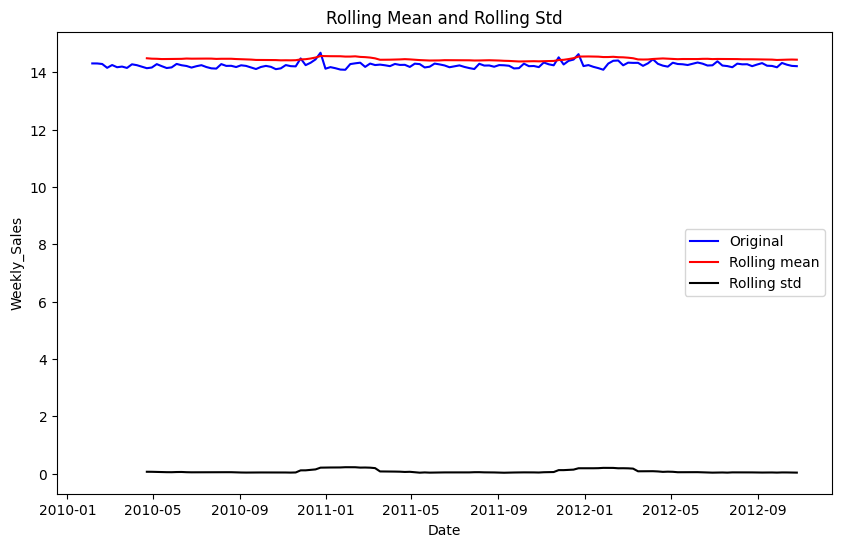

In [275]:
plt.figure(figsize=(10,6))
sns.lineplot(x="Date",y="Weekly_Sales",color = 'blue',label = 'Original',data=log_df)
sns.lineplot(x="Date",y="Weekly_Sales",data=rolling_mean,color = 'red',label = 'Rolling mean')
sns.lineplot(x="Date",y="Weekly_Sales",data=rolling_std,color = 'black',label = 'Rolling std')
plt.legend(loc = 'best')
plt.title('Rolling Mean and Rolling Std')
plt.show()

In [267]:
train=log_df2.iloc[:120,:]
test=log_df2.iloc[120:,:]

In [268]:
train

,Weekly_Sales
Date,
2010-02-05,14.574909
2010-02-12,14.575292
2010-02-19,14.569024
2010-02-26,14.438824
2010-03-05,14.504154
...,...
2012-04-20,14.429260
2012-04-27,14.383170
2012-05-04,14.469895


In [269]:
test

,Weekly_Sales
Date,
2012-05-25,14.464074
2012-06-01,14.462662
2012-06-08,14.513753
2012-06-15,14.489946
2012-06-22,14.450887
2012-06-29,14.447339
2012-07-06,14.529199
2012-07-13,14.419868
2012-07-20,14.414164


In [270]:
rmse=[]
order=[]
for pdq in pdq_combination:
  model=ARIMA(train,order=pdq)
  model_fit=model.fit()
  pred=model_fit.predict(start=120,end=142)
  error=np.sqrt(mean_squared_error(test,pred))
  order.append(pdq)
  rmse.append(error)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  

In [271]:
results=pd.DataFrame(index=order,data=rmse,columns=["RMSE"])
results

,RMSE
"(1, 0, 1)",0.042983
"(1, 0, 2)",0.043140
"(1, 0, 3)",0.043293
"(1, 0, 4)",0.043729
"(1, 0, 5)",0.042193
"(1, 0, 6)",0.043630
"(1, 0, 7)",0.043649
"(2, 0, 1)",0.043438
"(2, 0, 2)",0.043490
"(2, 0, 3)",0.043174


In [272]:
results.sort_values(by="RMSE",ascending=True)

,RMSE
"(4, 0, 7)",0.040910
"(3, 0, 2)",0.041169
"(3, 0, 5)",0.041477
"(4, 0, 6)",0.041550
"(6, 0, 1)",0.041741
"(4, 0, 5)",0.041912
"(5, 0, 7)",0.042091
"(1, 0, 5)",0.042193
"(6, 0, 3)",0.042372
"(5, 0, 5)",0.042553


In [276]:
model=ARIMA(train,order=(4,0,7),seasonal_order=(4,0,7,12))

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


In [277]:
model_fit=model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [278]:
log_df2["Arima Prediction"]=model_fit.predict(end=len(train)+len(test)-1)

In [279]:
log_df2

,Weekly_Sales,Arima Prediction
Date,,
2010-02-05,14.574909,14.466818
2010-02-12,14.575292,14.516693
2010-02-19,14.569024,14.521910
2010-02-26,14.438824,14.514573
2010-03-05,14.504154,14.460265
...,...,...
2012-09-28,14.373107,14.465001
2012-10-05,14.507818,14.480896
2012-10-12,14.457757,14.483357


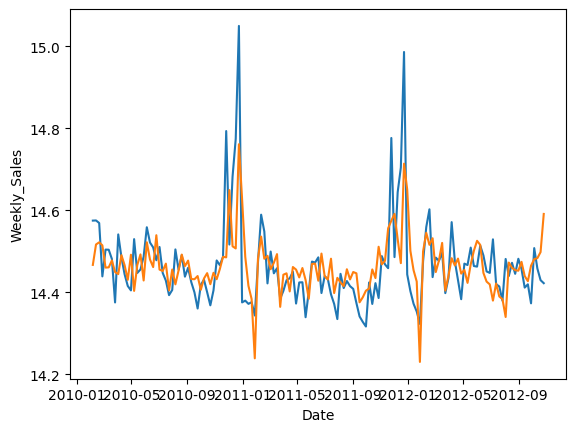

In [281]:
sns.lineplot(log_df2["Weekly_Sales"])
sns.lineplot(log_df2["Arima Prediction"])
plt.show()

In [282]:
future=model_fit.forecast(steps=35)
future

,predicted_mean
2012-05-25,14.501392
2012-06-01,14.525661
2012-06-08,14.515640
2012-06-15,14.447240
2012-06-22,14.426130
2012-06-29,14.419283
2012-07-06,14.379696
2012-07-13,14.421468
2012-07-20,14.389810
2012-07-27,14.383345


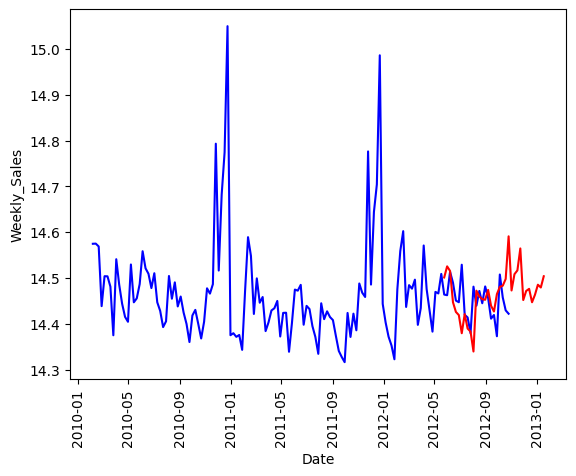

In [284]:
sns.lineplot(log_df2["Weekly_Sales"],color="blue")
sns.lineplot(future,color="red")
plt.xticks(rotation=90)
plt.show()

I have given the predictions for first 2 stores , same procedures for all other stores
